<a href="https://colab.research.google.com/github/RebeccaKessler/Machine_Learning/blob/main/Codes/Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df_training_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/Data/training_data.csv')
df_unlabelled_test_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/Data/unlabelled_test_data.csv')

In [ ]:
df_training_data.head(5)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df_unlabelled_test_data.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


# Logistic Regresssion

## Train on the 80% of training data, test on 20% of training data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Split the training dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # add shuffle=True ?

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english') # consider only single words (unigrams), remove common english stopwords
x_train_tfidf = vectorizer.fit_transform(x_train) # fit vectorizer on + transfrom train data
x_test_tfidf = vectorizer.transform(x_test) # transform test data

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred = model_LR.predict(x_test_tfidf)

df_pred_LR = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred})
df_pred_LR

,id,difficulty
0,596,A1
1,3370,B2
2,3048,C2
3,2908,B1
4,8,A2
...,...,...
955,2968,A1
956,198,C2
957,2422,C2
958,1485,C2


In [ ]:
# Get the accuracy
accuracy_LR_split = accuracy_score(y_test, LR_pred)
print("Accuracy of the Logistic Regression model for split train-test dataset:", accuracy_LR_split)

Accuracy of the Logistic Regression model for split train-test dataset: 0.44583333333333336


In [ ]:
# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision = precision_score(y_test, LR_pred, average='macro')
print("Precision:", precision)

recall = recall_score(y_test, LR_pred, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, LR_pred, average='macro')
print("F1-score:", f1)

Precision: 0.44037252365140805
Recall: 0.44431901424459186
F1-score: 0.438613907369678


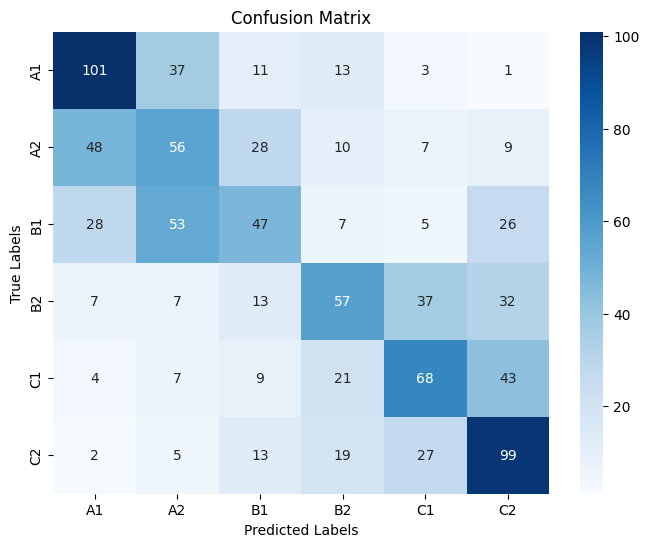

In [ ]:
cm = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Train on the full training data, test on the unlabelled test data

In [ ]:
# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# define test data
x_test = df_unlabelled_test_data['sentence']

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
x_full_tfidf = vectorizer.fit_transform(x) # fit vectorizer on + transfrom train data
x_test_tfidf = vectorizer.transform(x_test) # transform test data


In [ ]:
# Initialize and train the Logistic Regression model on the whole dataset
model_LR = LogisticRegression()
model_LR.fit(x_full_tfidf, y)

LogisticRegression()

In [ ]:
# Make predictions on the test data with the trained model
LR_pred_test = model_LR.predict(x_test_tfidf)

df_pred_LR_full = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred_test})
df_pred_LR_full

,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,B1
1196,1196,A2
1197,1197,C2
1198,1198,C1


In [ ]:
# Export the dataframe as csv
df_pred_LR_full.to_csv("submission_1.csv", index=False)

# KNN

# Decision Tree

# Random Forest

# Other technique